In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import acc_from_auc

In [10]:
results = []
for auc in np.linspace(0.5, 1.0, 20):
    scores = {
        'auc': auc
    }
    for (p, n) in [(100, 900), (200, 800), (300, 700), (400, 600), (500, 500)]:
        try:
            interval = acc_from_auc(
                scores=scores,
                eps=1e-4,
                p=p,
                n=n
            )
            results.append((auc, interval[0], interval[1], interval[1] - interval[0], p, n))
        except:
            pass

In [11]:
data = pd.DataFrame(results, columns=['auc', 'int0', 'int1', 'diff', 'p', 'n'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


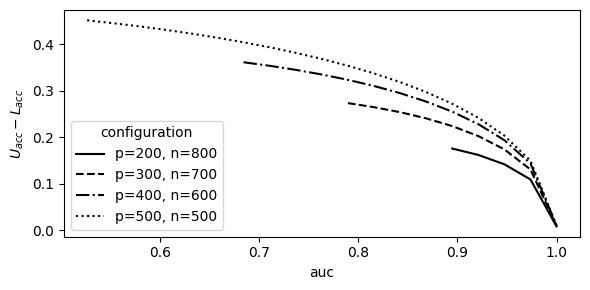

In [14]:
plt.figure(figsize=(6, 3))

tmp0 = data[(data['p'] == 200) & (data['n'] == 800)]
plt.plot(tmp0['auc'], tmp0['diff'], label='p=200, n=800', color='black', ls='solid')

tmp0 = data[(data['p'] == 300) & (data['n'] == 700)]
plt.plot(tmp0['auc'], tmp0['diff'], label='p=300, n=700', color='black', ls='dashed')

tmp0 = data[(data['p'] == 400) & (data['n'] == 600)]
plt.plot(tmp0['auc'], tmp0['diff'], label='p=400, n=600', color='black', ls='-.')

tmp0 = data[(data['p'] == 500) & (data['n'] == 500)]
plt.plot(tmp0['auc'], tmp0['diff'], label='p=500, n=500', color='black', ls=':')

plt.xlabel('auc')
plt.ylabel(r'$U_{acc} - L_{acc}$')

plt.legend(title='configuration')

plt.tight_layout()
plt.savefig('p5.eps')
plt.show()